# Loan Application Status Prediction Project

In [89]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [90]:
#Loading the dataset
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [91]:
df.shape

(614, 13)

This dataset contains 614 rows and 13 columns.

In [92]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [94]:
df.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
522,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
152,LP001531,Male,No,0,Graduate,No,9166,0.0,244.0,360.0,1.0,Urban,N
573,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N
59,LP001199,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y
272,LP001892,Male,No,0,Graduate,No,2833,1857.0,126.0,360.0,1.0,Rural,Y
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y
491,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
360,LP002161,Female,No,1,Graduate,No,4723,0.0,81.0,360.0,1.0,Semiurban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y


In [95]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [96]:
#To see columns in a list
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [97]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [98]:
for i in df.columns:
    if(df[i].dtype==object):
        print(i,"\n")
        print(df[i].value_counts(),"\n")

Loan_ID 

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 

Gender 

Male      489
Female    112
Name: Gender, dtype: int64 

Married 

Yes    398
No     213
Name: Married, dtype: int64 

Dependents 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Education 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Property_Area 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Loan_Status 

Y    422
N    192
Name: Loan_Status, dtype: int64 



In [99]:
df['Loan_ID'].nunique()

614

Here, we can see that "Loan_ID" is unique for every application, since it is not useful for prediction we will drop it.

In [100]:
df.drop('Loan_ID', axis =1, inplace=True)

In [101]:
df.shape

(614, 12)

# Checking Null values

In [102]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [104]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [105]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [106]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [107]:
#Changing the values of 'Dependents'
df.replace('3+', '4', inplace=True)

In [108]:
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [109]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [110]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [111]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

# To Fill up the Null values

In [112]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [113]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [115]:
df['Dependents'] = df['Dependents'].astype(str).astype(int)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [117]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

<Axes: >

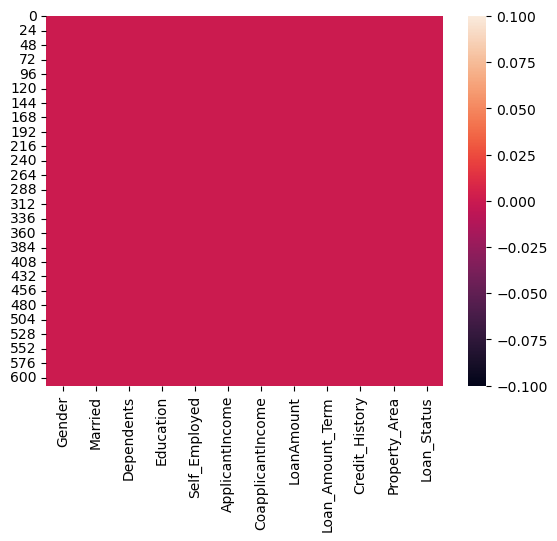

In [118]:
sns.heatmap(df.isnull())

Now, we can see that no null values present.

# Checking Duplicate values

In [119]:
df.duplicated().sum()

0

In [120]:
df[df.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No duplicates found.

# Data Visualisation

Univariant Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64

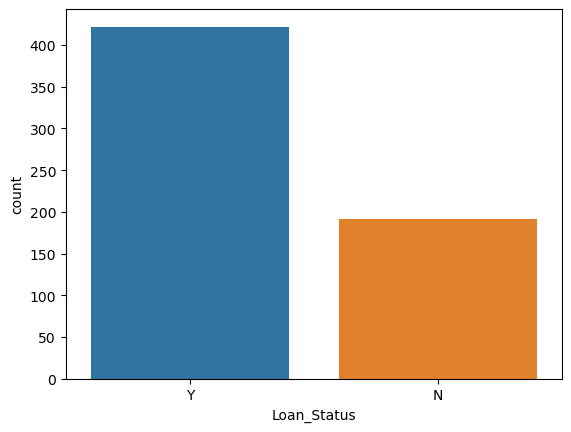

In [121]:
sns.countplot(x='Loan_Status', data =df)
df['Loan_Status'].value_counts()

Here, we can see that most of the Loan status has been aproved. 

Male      502
Female    112
Name: Gender, dtype: int64

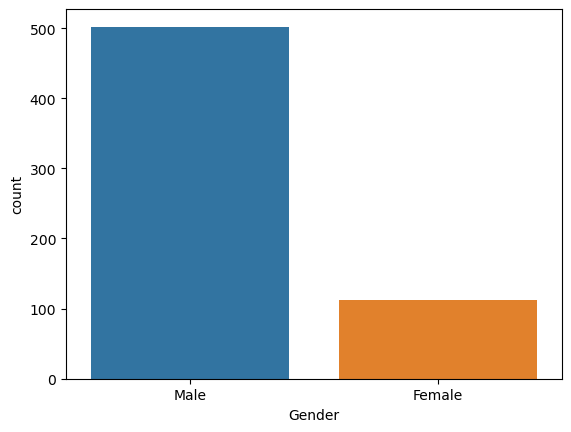

In [122]:
sns.countplot(x='Gender', data =df)
df['Gender'].value_counts()

Number of Males are more in this dataset.

Yes    401
No     213
Name: Married, dtype: int64

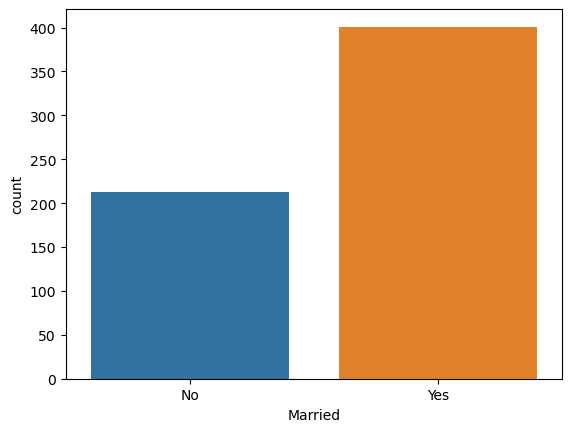

In [123]:
sns.countplot(x='Married', data =df)
df['Married'].value_counts()

Most of them are married. 

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

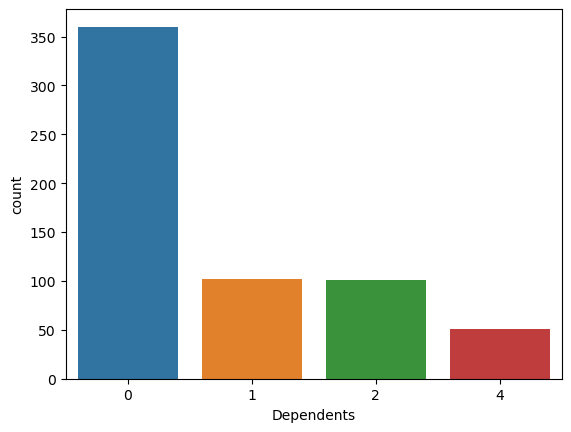

In [124]:
sns.countplot(x='Dependents', data =df)
df['Dependents'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

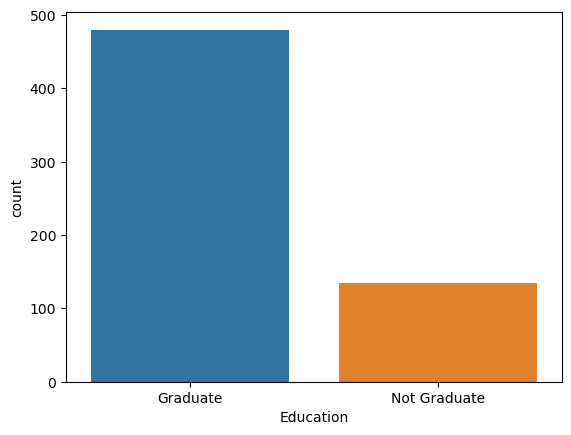

In [125]:
sns.countplot(x='Education', data =df)
df['Education'].value_counts()

Most of the people who applied for loan are graduated.

No     532
Yes     82
Name: Self_Employed, dtype: int64

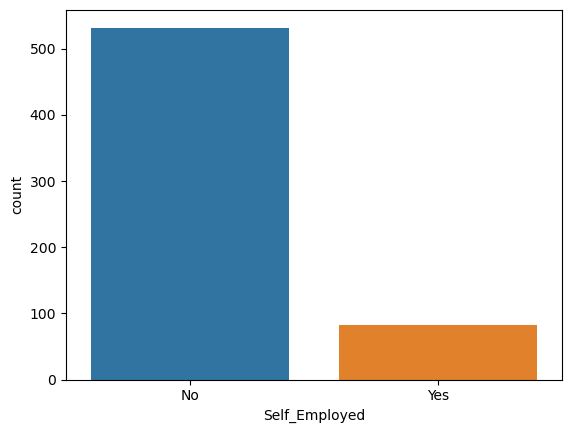

In [126]:
sns.countplot(x='Self_Employed', data =df)
df['Self_Employed'].value_counts()

Most of them are not self Employed.

1.0    525
0.0     89
Name: Credit_History, dtype: int64

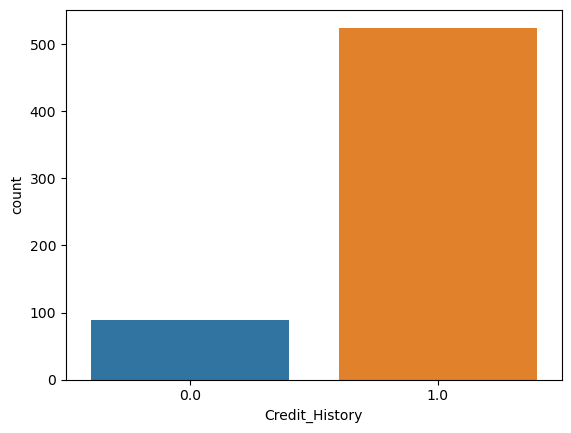

In [127]:
sns.countplot(x='Credit_History', data =df)
df['Credit_History'].value_counts()

Most of the people who applied for loan are having Credit History.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

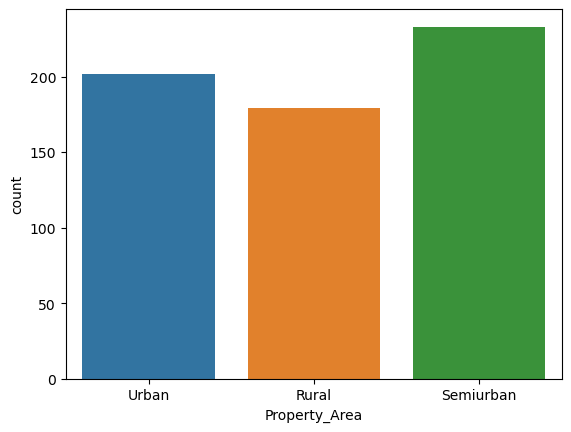

In [128]:
sns.countplot(x='Property_Area', data =df)
df['Property_Area'].value_counts()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

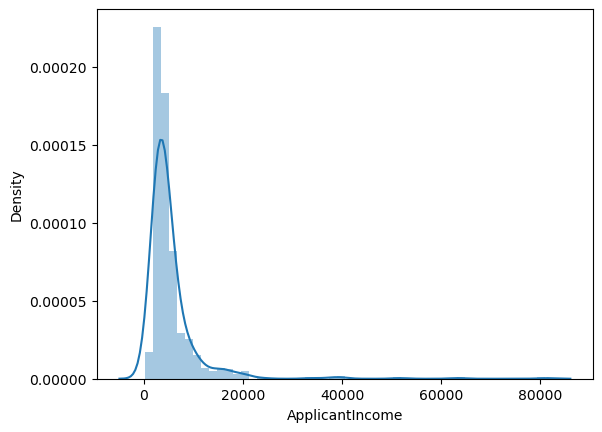

In [129]:
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

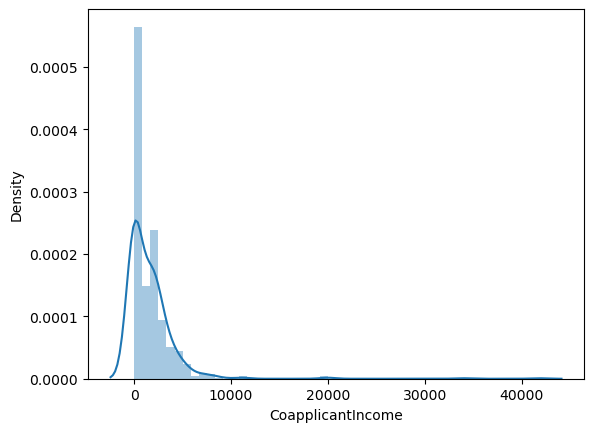

In [130]:
sns.distplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

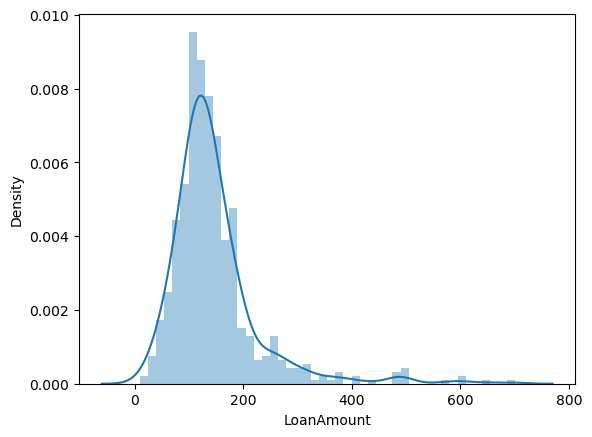

In [131]:
sns.distplot(df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

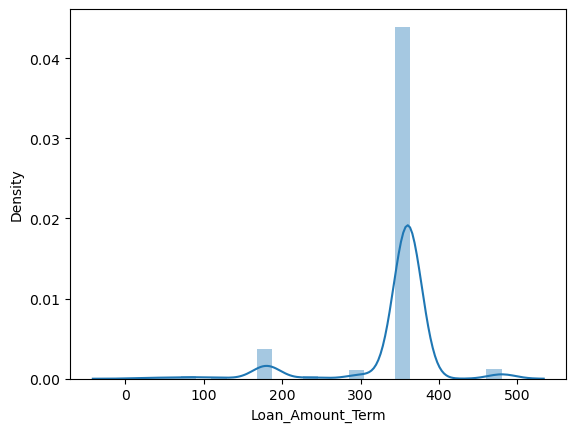

In [132]:
sns.distplot(df['Loan_Amount_Term'])

Bivariant Analysis

<Axes: xlabel='Loan_Status', ylabel='count'>

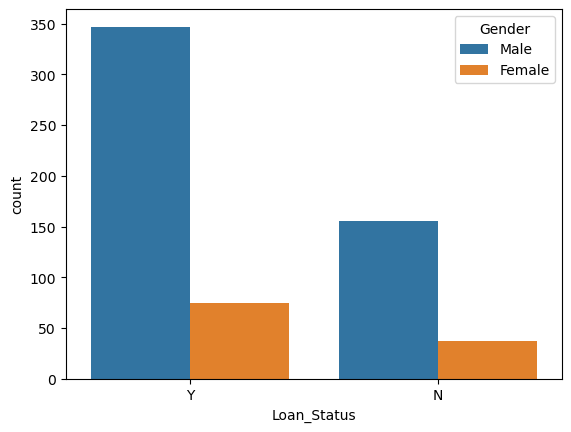

In [134]:
sns.countplot(x='Loan_Status',hue='Gender',data=df)

Loan status of males are having higher approval rate. 

<Axes: xlabel='Loan_Status', ylabel='count'>

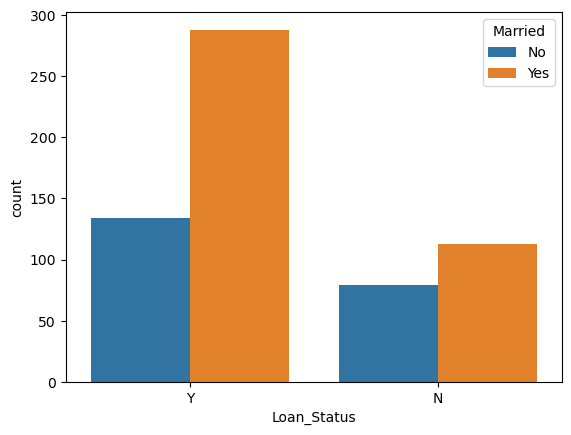

In [135]:
sns.countplot(x='Loan_Status',hue='Married',data=df)

Loan status of married people are having higher approval rate

<Axes: xlabel='Loan_Status', ylabel='count'>

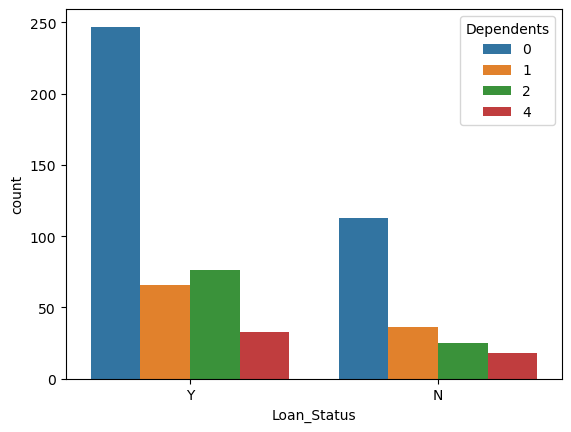

In [136]:
sns.countplot(x='Loan_Status',hue='Dependents',data=df)

Loan status of Zero dependents are having higher approval rate

<Axes: xlabel='Loan_Status', ylabel='count'>

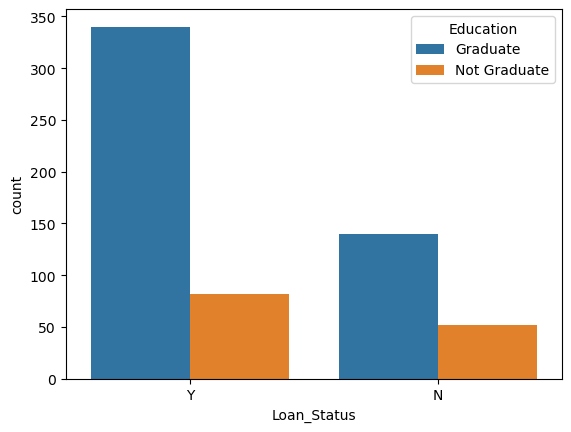

In [137]:
sns.countplot(x='Loan_Status',hue='Education',data=df)

Loan status of Graduates are having higher approval rate

<Axes: xlabel='Loan_Status', ylabel='count'>

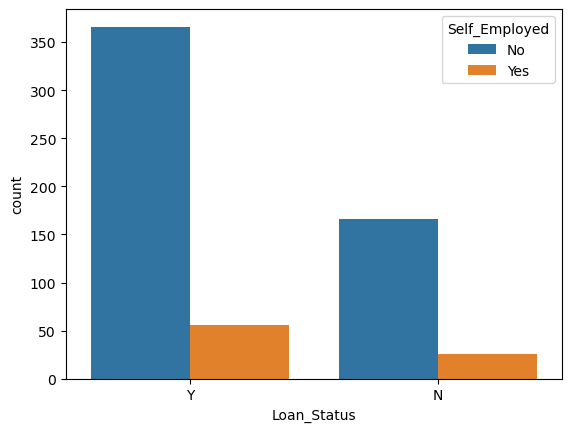

In [138]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df)

Loan status of people who are not self employed are having higher approval rate.

<Axes: xlabel='Loan_Status', ylabel='count'>

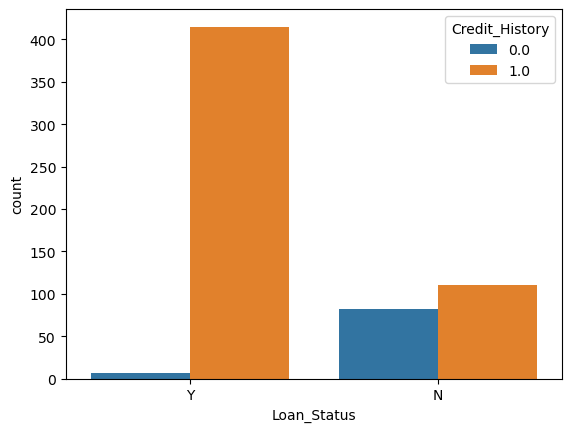

In [139]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=df)

Loan status of people who are having Credit history have higher approval rate.

<Axes: xlabel='Loan_Status', ylabel='count'>

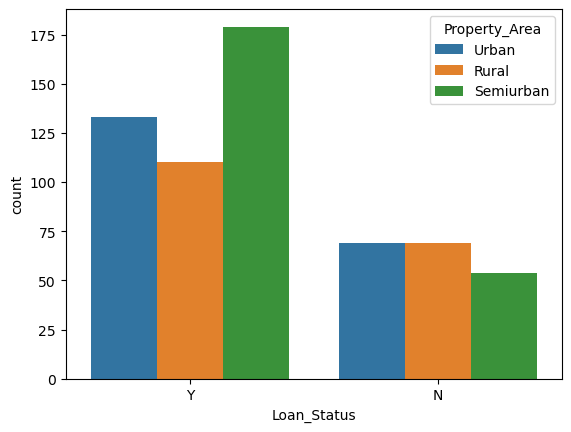

In [140]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=df)

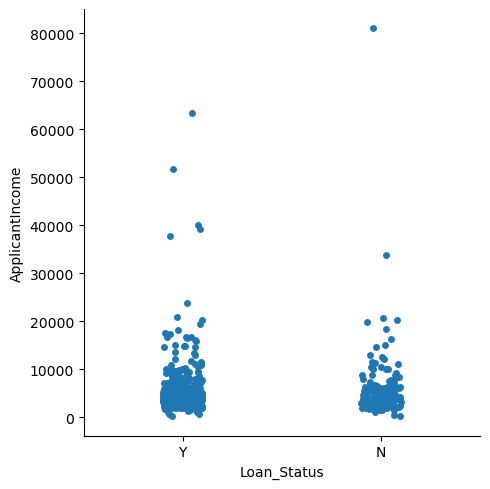

In [141]:
sns.catplot(x='Loan_Status',y='ApplicantIncome',data=df)

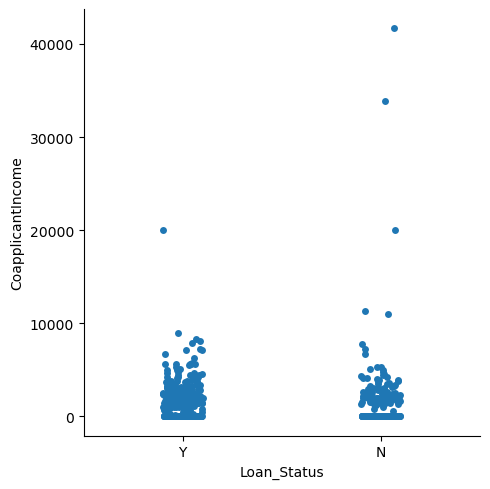

In [142]:
sns.catplot(x='Loan_Status',y='CoapplicantIncome',data=df)

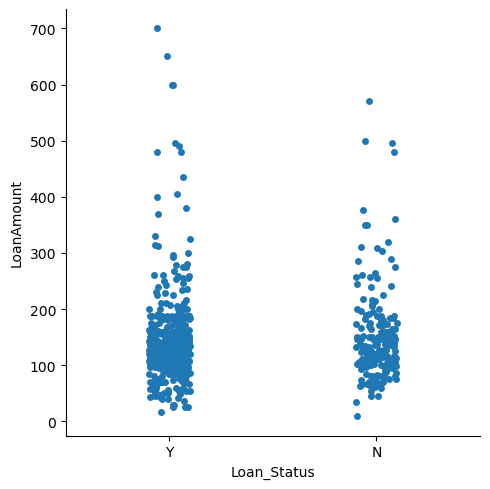

In [143]:
sns.catplot(x='Loan_Status',y='LoanAmount',data=df)

# Encoding categorical column

Converting Categorical column to numerical

In [144]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,4,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 55.3 KB


In [146]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [147]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.827362,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Here, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas.
    2.The counts are same, so missing/null values.
    3.In "ApplicantIncome", "CoapplicantIncome"and'LoanAmount' columns, mean is greater than median,so Right side skewness.
    4.There is also huge difference between 75% and max in  "ApplicantIncome", "CoapplicantIncome" and 'LoanAmount'
      columns,so outliers are present. 

# Checking Correlation

In [148]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.165877,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.308408,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.165877,0.308408,1.000000,0.059001,0.048028,0.134080,0.034780,0.170666,-0.104059,-0.047203,-0.012006,0.002474
Education,0.045364,0.012304,0.059001,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.048028,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.134080,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.034780,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.170666,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.104059,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.047203,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<Axes: >

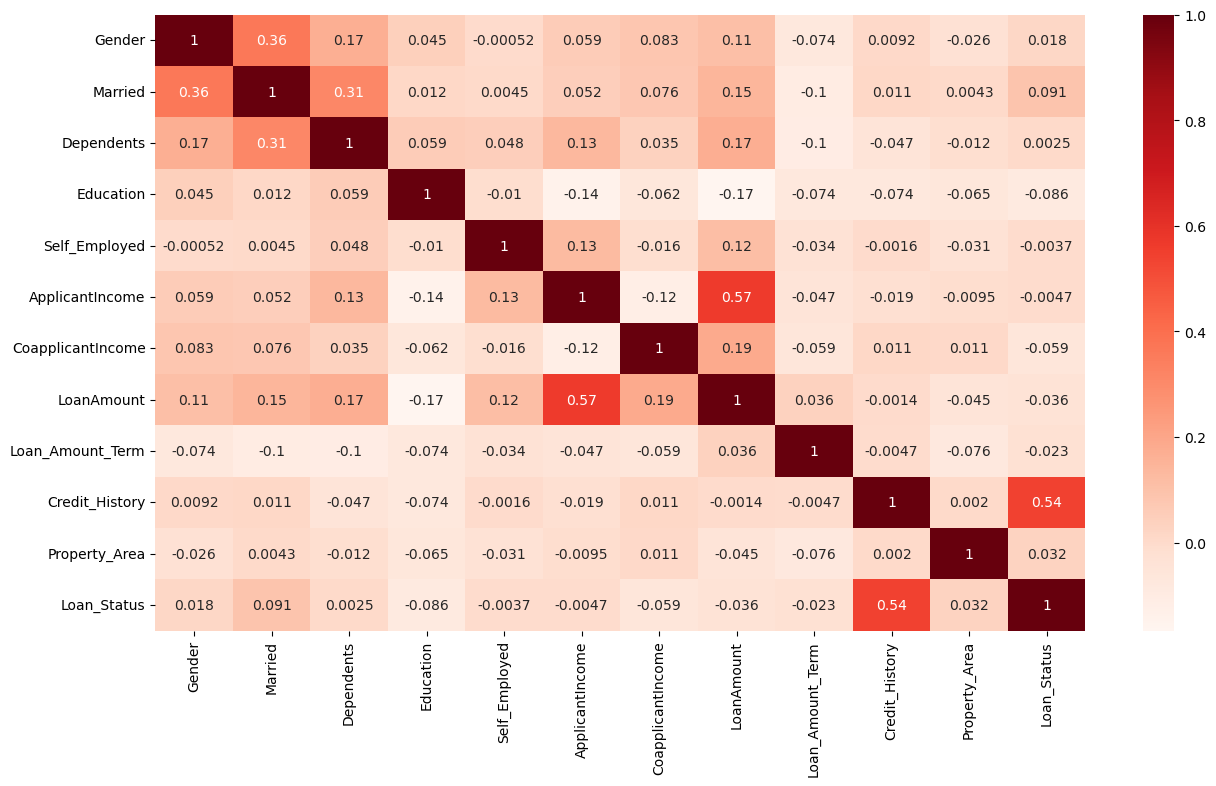

In [149]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

Here, we can observe that,

    1."Credit_History" feature has positive correlation with target variable.
    2."ApplicantIncome" and "LoanAmount" have high positive correlation.

# Checking Outliers

Gender                   Axes(0.125,0.77;0.352273x0.11)
Married               Axes(0.547727,0.77;0.352273x0.11)
Dependents              Axes(0.125,0.638;0.352273x0.11)
Education            Axes(0.547727,0.638;0.352273x0.11)
Self_Employed           Axes(0.125,0.506;0.352273x0.11)
ApplicantIncome      Axes(0.547727,0.506;0.352273x0.11)
CoapplicantIncome       Axes(0.125,0.374;0.352273x0.11)
LoanAmount           Axes(0.547727,0.374;0.352273x0.11)
Loan_Amount_Term        Axes(0.125,0.242;0.352273x0.11)
Credit_History       Axes(0.547727,0.242;0.352273x0.11)
Property_Area            Axes(0.125,0.11;0.352273x0.11)
Loan_Status           Axes(0.547727,0.11;0.352273x0.11)
dtype: object

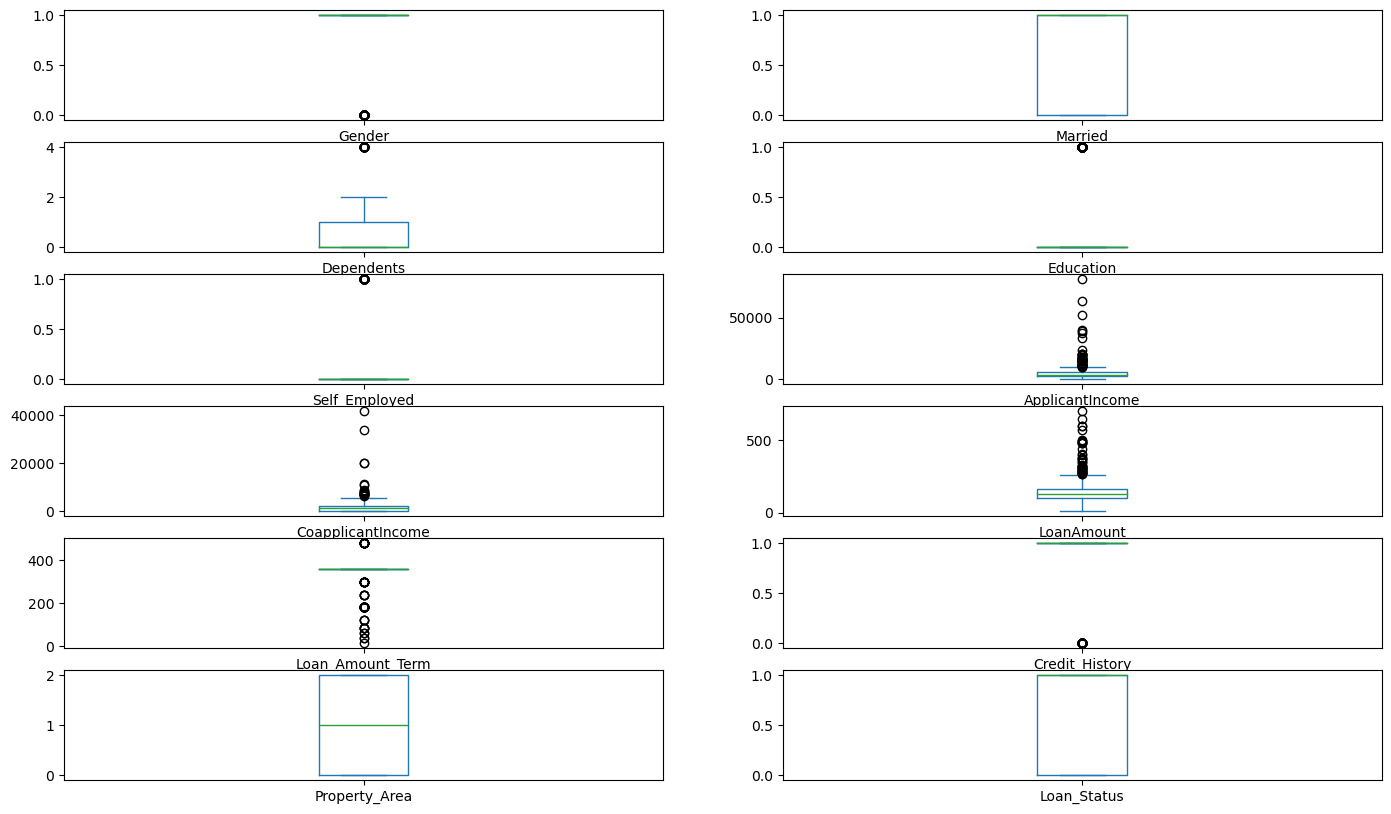

In [150]:
plot = df.plot(kind='box', subplots=True, layout=(6,2), figsize=(17,10))
plot

As we can see outliers are present, we will remove outliers using z score method

In [151]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.682729,0.528362,0.392601,0.072991,0.554487,0.000000,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.142459,0.528362,0.392601,0.134412,0.038732,0.219273,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.682729,0.528362,2.547117,0.393747,0.554487,0.957641,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.682729,1.892641,0.392601,0.462062,0.251980,0.314547,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.682729,0.528362,0.392601,0.097728,0.554487,0.064454,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.682729,0.528362,0.392601,0.410130,0.554487,0.898095,0.273231,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.618024,0.528362,0.392601,0.212557,0.554487,1.267279,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.142459,0.528362,0.392601,0.437174,0.472404,1.269371,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,0.967648,0.528362,0.392601,0.357064,0.554487,0.483367,0.273231,0.411733,1.223298,0.674519


In [152]:
# threshold =3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [153]:
z.iloc[9,6]

3.196712546212882

In [154]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,4,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [155]:
df.shape

(614, 12)

In [156]:
df_new.shape

(577, 12)

In [157]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  6.026058631921824


In [158]:
df=df_new
df.shape

(577, 12)

# Checking Skewness

In [159]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [160]:
df['ApplicantIncome'] = np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.cbrt(df['LoanAmount'])

Other features are categorical, so no need to remove skewness for that.

In [161]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Splitting target variable

In [162]:
x = df.drop("Loan_Status", axis = 1)
y= df['Loan_Status']

In [163]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,0.0,0.0,18.017473,0.000000,5.270588,360.0,1.0,2.0
1,1.0,1.0,1,0.0,0.0,16.610522,11.467457,5.039684,360.0,1.0,0.0
2,1.0,1.0,0,0.0,1.0,14.422496,0.000000,4.041240,360.0,1.0,2.0
3,1.0,1.0,0,1.0,0.0,13.720654,13.310098,4.932424,360.0,1.0,2.0
4,1.0,0.0,0,0.0,0.0,18.171206,0.000000,5.204828,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,14.260431,0.000000,4.140818,360.0,1.0,0.0
610,1.0,1.0,4,0.0,0.0,16.013010,0.000000,3.419952,180.0,1.0,0.0
611,1.0,1.0,1,0.0,0.0,20.059821,6.214465,6.324704,360.0,1.0,2.0
612,1.0,1.0,2,0.0,0.0,19.646281,0.000000,5.718479,360.0,1.0,2.0


In [164]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

# To remove biasness, we use Standard scaler method

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.670628,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.172406,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.670628,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.670628,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.670628,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.670628,-0.541961,-0.380580,-0.620151,-1.093504,-1.302297,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.701508,-0.541961,-0.380580,-0.040329,-1.093504,-2.336409,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.172406,-0.541961,-0.380580,1.298514,-0.177556,1.830577,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.015440,-0.541961,-0.380580,1.161699,-1.093504,0.960923,0.230853,0.418513,1.227472


# Checking multicollinearity

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.219609,Gender
1,1.383363,Married
2,1.152448,Dependents
3,1.071035,Education
4,1.060519,Self_Employed
5,1.801719,ApplicantIncome
6,1.602107,CoapplicantIncome
7,1.616590,LoanAmount
8,1.057109,Loan_Amount_Term
9,1.010166,Credit_History


Here we can see that no multicollinearity present between features.

# Balancing dataset

In [167]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

Here, we can see that data is not balanced. Since it is a classification problem, we will balance the data using oversampling method

In [168]:
import sklearn
from imblearn.over_sampling import SMOTE
SME = SMOTE()
x1,y1 = SME.fit_resample(x,y)

In [169]:
y1.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

Now, the dataset is balanced, we can go for model building.

# Model Building

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAcc = 0
maxRS= 0
for i in range(,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.9079497907949791 at random state  78


Train Test Split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [173]:
#Creating a list for models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
GNB = GaussianNB()
SV = SVC()

models = [LR, KNN, DTC, RFC, ETC, GBC, ABC, BC, GNB, SV]

In [174]:
for i in models:
    print(i)
    print("------------------------")
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print("Accuracy for ",i,"model is ", accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("Cross Validation:")
    print("-----------------")
    cv_score = cross_val_score(i,x1,y1)
    print("CV Scores are : ",cv_score)
    print("CV Score mean : ",cv_score.mean())
    print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,pred) - cv_score.mean())
    print('\n\n')

LogisticRegression()
------------------------
Accuracy for  LogisticRegression() model is  77.40585774058577
[[ 62  48]
 [  6 123]]
              precision    recall  f1-score   support

         0.0       0.91      0.56      0.70       110
         1.0       0.72      0.95      0.82       129

    accuracy                           0.77       239
   macro avg       0.82      0.76      0.76       239
weighted avg       0.81      0.77      0.76       239

Cross Validation:
-----------------
CV Scores are :  [0.7        0.71698113 0.76100629 0.71069182 0.67295597]
CV Score mean :  0.7123270440251572
Difference between Accuracy score and CV score is  0.061731533380700476



KNeighborsClassifier()
------------------------
Accuracy for  KNeighborsClassifier() model is  79.9163179916318
[[ 89  21]
 [ 27 102]]
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79       110
         1.0       0.83      0.79      0.81       129

    accuracy         

Extra Trees Classifier is our best model because Accuracy score and CV Score is high and difference between Accuracy score and CV score is least

# Extra Trees Classifier is our best model

# Hyper Parameter Tuning

In [175]:
#Using Grid Search CV on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [50, 100, 200],
              'max_depth' : [0, 10, 20]}

In [176]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5 )

In [177]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [180]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'log_loss', 'max_depth': 20, 'n_estimators': 100}


# Finding best random state for our best model.

In [179]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    ETC = ExtraTreesClassifier()
    ETC.fit(x_train,y_train)
    pred = ETC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.891213389121339 at random state  78


# Building Final model using best parameters

In [182]:
Final_model= ExtraTreesClassifier(criterion = 'log_loss', max_depth = 20, n_estimators = 100)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=78)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
Accuracy = accuracy_score(y_test,pred)
print("Accuracy is ", Accuracy*100 )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is  88.28451882845188
[[ 98  12]
 [ 16 113]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       110
         1.0       0.90      0.88      0.89       129

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



# The accuracy for our best model is 88%

# Saving the best model

In [186]:
import joblib
joblib.dump(Final_model, "Loan_Status_Prediction.pkl")

['Loan_Status_Prediction.pkl']

# Loading and Prediction

In [187]:
import joblib
model= joblib.load("Loan_Status_Prediction.pkl")

In [188]:
prediction=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","original value"])

In [189]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted value,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
original value,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Plotting AUC - ROC Curve

In [183]:
from sklearn import metrics

In [184]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)

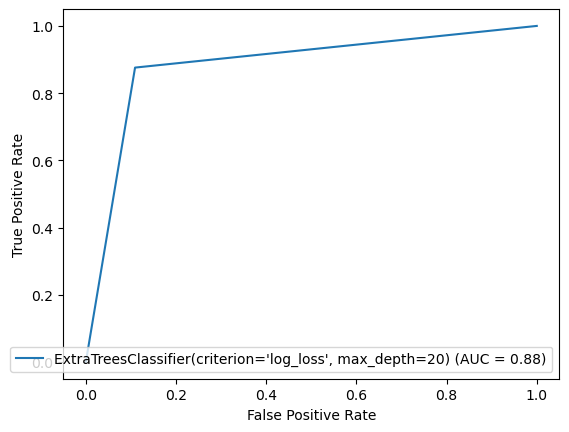

In [185]:
curve = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc= roc_auc, estimator_name=Final_model)
curve.plot()